In [8]:
# !IMPORTANT - to run this notebook download first train_and_test2.csv dataset from https://www.kaggle.com/datasets/heptapod/titanic and put it in same folder as for this notebook

# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import .csv data into DataFrame
patients = pd.read_csv('cancer_patient_data_sets.csv')
patients.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


<Axes: >

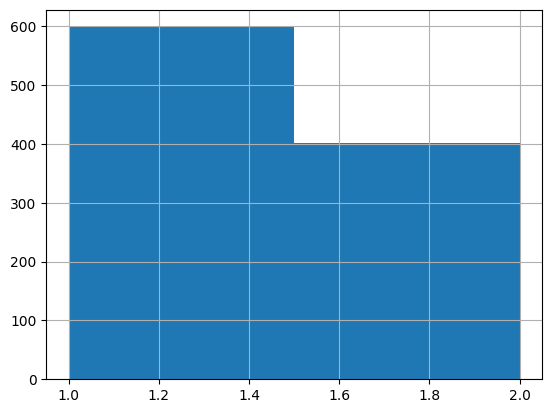

In [11]:
# Gender distribution
patients['Gender'].hist(bins= 2) 

<Axes: >

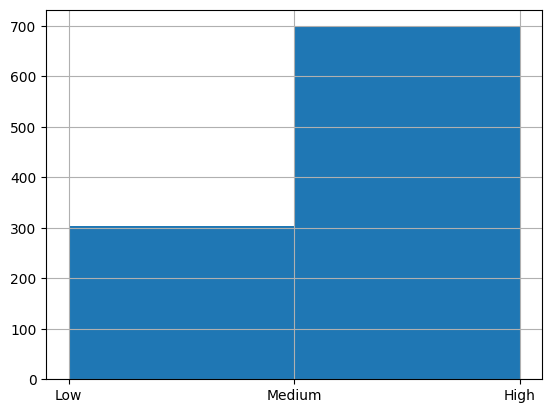

In [12]:
# distribution of "survived"
patients['Level'].hist(bins=2) 

<Axes: >

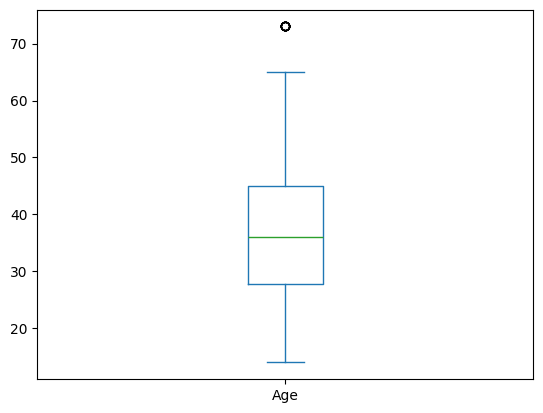

In [13]:
# distribution of Age
patients['Age'].plot.box() 

In [14]:
# removed empty columns and not needed 
patients.drop(['index', 'Patient Id'], axis=1, inplace = True)
patients

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [29]:
# fill missing values
patients.fillna(patients.mean(), inplace=True)
passengersCopy = patients.copy()
patients['Level']

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [32]:
#what if some of columns were categorical instead numeric? 
# maps = {
#     0: 'Low',
#     1: 'Medium',
#     2: 'High'
# }
# patients['Level'] = patients['Level'].apply(lambda x: maps[x])
# print(patients)

###################################################################

# maps = {
#     'Low' : 0,
#     'Medium' : 1,
#     'High' : 2
# }
# patients['Level'] = patients['Level'].apply(lambda x: maps[x])

patients

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


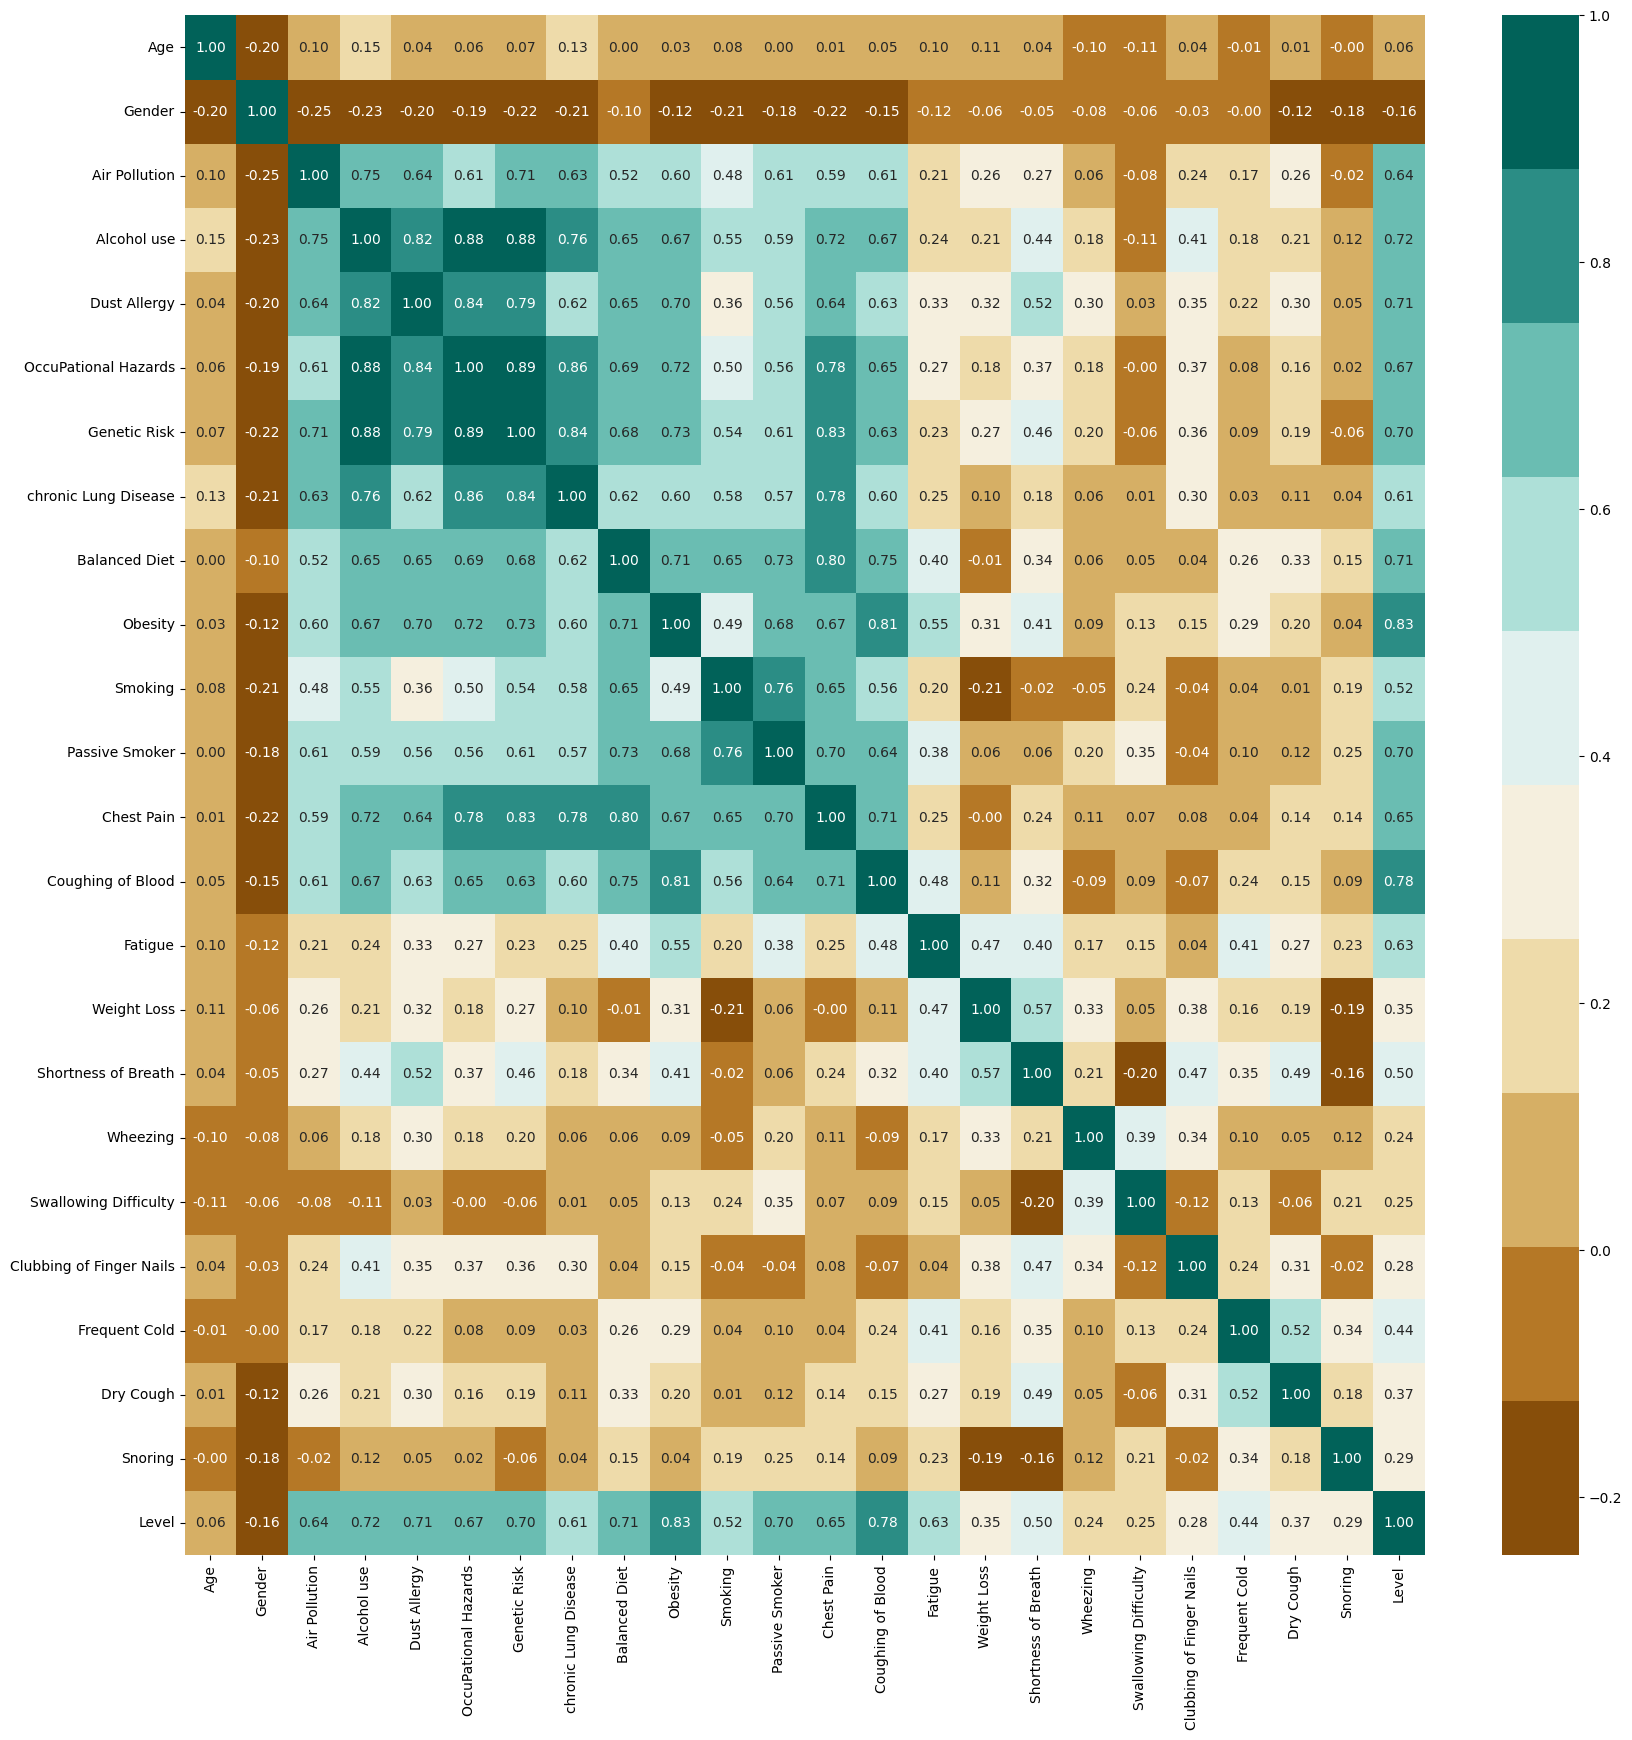

In [33]:
# generate correlation matrix

correlations = patients.corr()
fig, ax = plt.subplots(figsize=(20, 20))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
# ax.set_yticklabels(patients.columns)

plt.show()

# columns meanings:
# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [31]:
# create training set
X = patients.drop('2urvived', axis=1).to_numpy()
X

KeyError: "['2urvived'] not found in axis"

In [ ]:
# create labels for training set
y = patients.loc[:, '2urvived'].to_numpy()
y

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# split data for training model and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [ ]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [ ]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.9329896907216495, 0.8190045248868778, 0.872289156626506, 0.7977099236641222]


In [ ]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]


In [ ]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8814432989690721, 0.8300970873786407, 0.8550000000000001, 0.7786259541984732]


<AxesSubplot:>

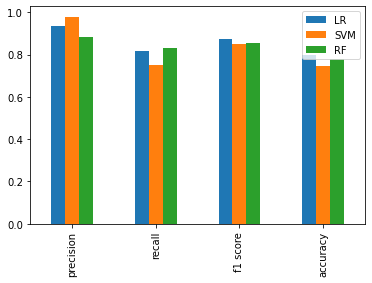

In [ ]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [ ]:
# corrections and adjustments - use artificial neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.9329896907216495, 0.8190045248868778, 0.872289156626506, 0.7977099236641222]


In [ ]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [ ]:
# corrections and adjustments - use different hyperparameters

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.9639175257731959, 0.751004016064257, 0.8442437923250563, 0.7366412213740458]
SVM kernel='sigmoid' [0.8608247422680413, 0.7660550458715596, 0.8106796116504854, 0.7022900763358778]
SVM degree=4 [0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]
